Segui el ejemplo de la clase 1 dts03 actividad 2. con un feature menos

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns

In [18]:
# Creamos una función sigmoide

def sigmoid_function(x,w0, w1):
   
    z = w0 + w1*x # Notar que es una funcion lineal
    y = 1/(1 + np.exp(-z))   # Notar que es una composición
    return y

In [19]:
# Cargamos el dataset en una estructura DataFrame de Pandas
data = pd.read_excel(r"C:\Users\Santi\OneDrive\Escritorio\Proyectos DTS\Datathon\E-Commerce_train.xlsx")
data.rename(columns={'Reached.on.Time_Y.N': 'Reached_on_time'}, inplace=True)

data['Warehouse_block'].replace('A',1, inplace=True)
data['Warehouse_block'].replace('B',2, inplace=True)
data['Warehouse_block'].replace('C',3, inplace=True)
data['Warehouse_block'].replace('D',4, inplace=True)
data['Warehouse_block'].replace('F',5, inplace=True)

data['Mode_of_Shipment'].replace('Flight',1, inplace=True)
data['Mode_of_Shipment'].replace('Ship',2, inplace=True)
data['Mode_of_Shipment'].replace('Road',3, inplace=True)

data['Product_importance'].replace('low',1, inplace=True)
data['Product_importance'].replace('medium',2, inplace=True)
data['Product_importance'].replace('high',3, inplace=True)

data['Gender'].replace('F',1, inplace=True)
data['Gender'].replace('M',2, inplace=True)

data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,1,4,1,4,2,177,3,1,1,44,1233,1
1,2,5,1,4,5,216,2,1,2,59,3088,1
2,3,1,1,2,2,183,4,1,2,48,3374,1
3,4,2,1,3,3,176,4,2,2,10,1177,1
4,5,3,1,2,2,184,3,2,1,46,2484,1


In [20]:
#QUITAMOS ALGO DE RUIDO
data.drop(columns=['Warehouse_block'], inplace=True)
data.head()

,ID,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,1,1,4,2,177,3,1,1,44,1233,1
1,2,1,4,5,216,2,1,2,59,3088,1
2,3,1,2,2,183,4,1,2,48,3374,1
3,4,1,3,3,176,4,2,2,10,1177,1
4,5,1,2,2,184,3,2,1,46,2484,1


In [21]:
X = data.iloc[:,1:-1].values
y = data.iloc[:, 10].values
X.shape
y.shape

(8999,)

In [22]:
#NORMALIZAMOS VARIABLES
from sklearn.preprocessing import StandardScaler

escaler = StandardScaler()
X_est = escaler.fit_transform(X)

ValueError: x and y must be the same size

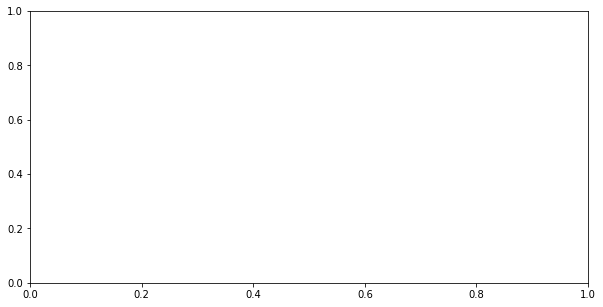

In [23]:
# Graficamos los puntos de nuestro dataset sintético

plt.figure(figsize = (10,5))
plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

In [ ]:
# Importamos la clase que contiene el algoritmo de regresíon logística

from sklearn.linear_model import LogisticRegression

# Instanciamos el modelo y lo entrenamos

clf = LogisticRegression()

# Lo entrenamos

clf.fit(X,y)

LogisticRegression()

In [27]:
# Importamos una métrica utilizada para evaluar modelos de clasificación. Ya ahondaremos con mayor especificidad en las métricas de clasificación en la clase 3

from sklearn.metrics import accuracy_score 

# Predecimos

y_pred = clf.predict(X)

# Evaluamos

print('El score del modelo es:', accuracy_score(y, y_pred))

El score del modelo es: 0.6675186131792421


In [ ]:
# Observamos los parámetros de la función sigmoide

print(clf.coef_, clf.intercept_)

[[ 0.03027249  0.07799224 -0.09198622 -0.00030631 -0.02629636  0.17907003
   0.12100954  0.1251673  -0.00023223]] [0.06882886]


In [ ]:
# Graficamos la curva obtenida por la regresión logística

plt.figure(figsize = (10,5))


plt.scatter(X, y, c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)
x_plot = np.linspace(-7,12,100)
plt.plot(x_plot, sigmoid_function(x_plot,clf.intercept_[0], clf.coef_[0][0]))

plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()